# Results Tracking Tool (for 60-min timeframe)

In [80]:
import numpy.matlib 
import numpy as np, pandas as pd, scipy.io as sp, matplotlib.pyplot as plt, matplotlib.style as style
from matplotlib.backends.backend_pdf import PdfPages
style.use('fivethirtyeight')
from statistics import mean
from pathlib import Path
import csv

%matplotlib inline
%config InlineBackend.figure_format ='retina'

### The code block below reads a given init file and obtains the relevant test number. If you don't have an init file yet, comment this block and input your .mat filename in the code block right after.

In [81]:
# with open('init.csv',encoding='utf-8-sig') as input_file:
#     readCSV = csv.reader(input_file, delimiter=',')   
#     for row in readCSV:   # Takes the integer from the csv and forms the relevant filename.
#         if int(row[0],10) < 10:
#             sim_number = "simData_00"  + row[0] 
#         if int(row[0],10) >= 10 and int(row[0],10) < 100:
#             sim_number = "simData_" + "0" + row[0]
#         if int(row[0],10) >= 100:
#             sim_number = "simData_" + row[0]
            
# test_number = row[0]
# sim_pdf = matplotlib.backends.backend_pdf.PdfPages(sim_number + "_TEST" ".pdf") # Creating PDF here
# mat_file = sp.loadmat(sim_number + ".mat") # loading the relevant .mat file

In [82]:
sim_number = "sim2_1"  #CHANGE FILENAME HERE!
#sim_pdf = PdfPages(sim_number + "_TEST" ".pdf") # Creating PDF here


mat_file = sp.loadmat(sim_number + ".mat") # loading the relevant .mat file
test_number = sim_number

In [83]:
sim_volmag_vals = mat_file['vmag_new']
sim_volang_vals = mat_file['vang_new']
sim_realpwr_vals = mat_file['pnew']
sim_reactivepwr_vals = mat_file['qnew']
sim_volmag_ref = mat_file['vmag_ref_sig']
sim_volang_ref = mat_file['vang_ref_sig']

In [126]:
sim_vol_A_list, sim_vol_B_list, sim_vol_C_list = ([] for i in range(3))
sim_ang_A_list, sim_ang_B_list, sim_ang_C_list = ([] for i in range(3))
sim_realpwr_A_list, sim_realpwr_B_list, sim_realpwr_C_list = ([] for i in range(3))
sim_reactivepwr_A_list, sim_reactivepwr_B_list, sim_reactivepwr_C_list = ([] for i in range(3))
sim_vol_A_reflist, sim_vol_B_reflist, sim_vol_C_reflist = ([] for i in range(3))
sim_ang_A_reflist, sim_ang_B_reflist, sim_ang_C_reflist = ([] for i in range(3))

refpoints = []


for i in range(0,sim_volmag_vals.size//3):
    sim_vol_A_list.append((sim_volmag_vals[i][0])),sim_vol_B_list.append((sim_volmag_vals[i][1])),sim_vol_C_list.append((sim_volmag_vals[i][2]))
    sim_ang_A_list.append((sim_volang_vals[i][0])),sim_ang_B_list.append((sim_volang_vals[i][1])),sim_ang_C_list.append((sim_volang_vals[i][2]))
    sim_realpwr_A_list.append((sim_realpwr_vals[i][0])),sim_realpwr_B_list.append((sim_realpwr_vals[i][1])),sim_realpwr_C_list.append((sim_realpwr_vals[i][2]))
    sim_reactivepwr_A_list.append((sim_reactivepwr_vals[i][0])),sim_reactivepwr_B_list.append((sim_reactivepwr_vals[i][1])),sim_reactivepwr_C_list.append((sim_reactivepwr_vals[i][2]))

        
        
for i in range(0,sim_volmag_ref.size//3): #TEMP, changed 4 to 3
    sim_vol_A_reflist.append((sim_volmag_ref[i][0])),sim_vol_B_reflist.append((sim_volmag_ref[i][1])),sim_vol_C_reflist.append((sim_volmag_ref[i][2]))
#     refpoints.append((sim_volmag_ref[i][0]))
    sim_ang_A_reflist.append((sim_volang_ref[i][0])),sim_ang_B_reflist.append((sim_volang_ref[i][1])),sim_ang_C_reflist.append((sim_volang_ref[i][2]))
    
refpoints = []
for i in range(0, 3000): 
    refpoints.append(i)

In [85]:
#len(refpoints)  #sanity check
# len(sim_vol_A_reflist)
# x = [1, 2, 3]
# y = [1, 2, 3]
# plt.plot(x, y)
#print(refpoints[:301])
# print(len(sim_vol_A_reflist[:301]))

# The time values below were chosen arbitrarily. Please change the index values in the code blocks below to adjust for the timeframe you are looking at.

## Voltage Magnitudes from 9 to 9:05 AM

NameError: name 'sim_pdf' is not defined

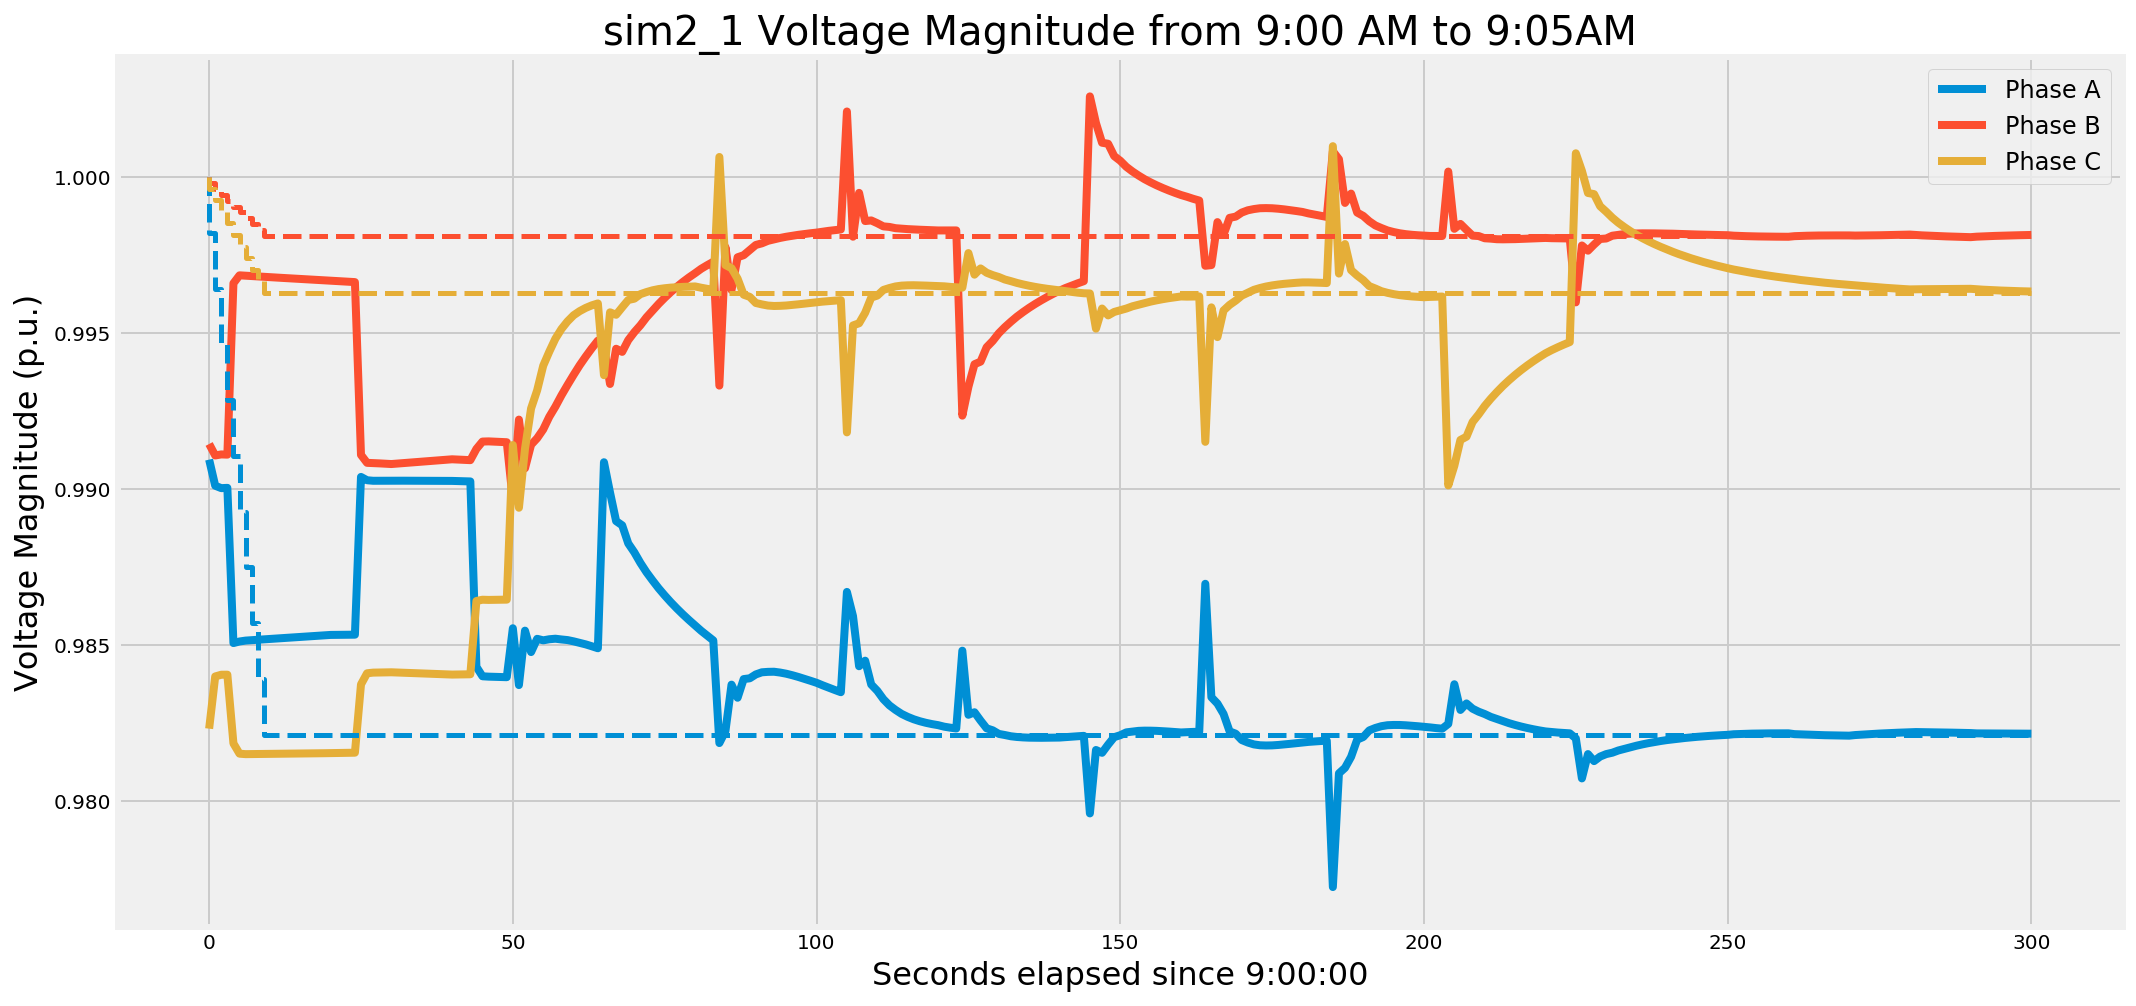

In [86]:
#graph V_mag over time
f1 = plt.figure()

plt.plot(sim_vol_A_list[:301])
plt.plot(sim_vol_B_list[:301])
plt.plot(sim_vol_C_list[:301])
plt.step(refpoints, sim_vol_A_reflist[:301],color = 'C0',linestyle = '--',linewidth = 2.5)
plt.step(refpoints, sim_vol_B_reflist[:301],color = 'C1',linestyle = '--',linewidth = 2.5)
plt.step(refpoints, sim_vol_C_reflist[:301],color = 'C2',linestyle = '--',linewidth = 2.5)

plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 9:00:00',fontsize = 16)
plt.title(sim_number + ' Voltage Magnitude from 9:00 AM to 9:05AM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})


sim_pdf.savefig(f1)

#plt.close()
plt.show()

## Voltage Magnitudes from 12 to 12:05 PM

In [ ]:
with PdfPages(sim_number + "_TEST" ".pdf") as sim_pdf:
    #graph V_mag over time
    
    plt.plot(sim_vol_A_list[300:601]) #Filler values
    plt.plot(sim_vol_B_list[300:601])
    plt.plot(sim_vol_C_list[300:601])

    plt.step(refpoints, sim_vol_A_reflist[300:601],color = 'C0',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_B_reflist[300:601],color = 'C1',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_C_reflist[300:601],color = 'C2',linestyle = '--',linewidth = 2.5)

    plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
    plt.xlabel('Seconds elapsed since 12:00:00',fontsize = 16)
    plt.title(sim_number + ' Voltage Magnitude from 12:00 PM to 12:05PM', fontsize = 20)
    #plt.ylim(bottom = 0.90,top=1.08)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})

    #plt.savefig('Vmag_12PM.png', dpi=100)
    sim_pdf.savefig(f2)
    # plt.close()
    plt.show()

## Voltage Magnitudes from 5 to 5:05 PM

In [ ]:
#graph V_mag over time
plt.plot(sim_vol_A_list[3300:3601]) #Filler values
plt.plot(sim_vol_B_list[3300:3601])
plt.plot(sim_vol_C_list[3300:3601])

plt.step(refpoints, sim_vol_A_reflist[3300:3601],color = 'C0',linestyle = '--',linewidth = 2.5)
plt.step(refpoints, sim_vol_B_reflist[3300:3601],color = 'C1',linestyle = '--',linewidth = 2.5)
plt.step(refpoints, sim_vol_C_reflist[3300:3601],color = 'C2',linestyle = '--',linewidth = 2.5)


plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 17:00:00',fontsize = 16)
plt.title(sim_number + ' Voltage Magnitude from 5:00 PM to 5:05PM', fontsize = 20)
#plt.ylim(bottom = 0.92,top=1.08)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C', 'Reference voltage'], loc='best', prop={'size': 12})

#sim_pdf.savefig()
# plt.close()
plt.show()

## Voltage Angles from 9 to 9:05 AM

In [ ]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[:301])
ax.step(refpoints, sim_ang_A_reflist[:301],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[:301], color = 'C1')
ax2.step(refpoints, sim_ang_B_reflist[:301],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[:301], color = 'C2')
ax3.step(refpoints, sim_ang_C_reflist[:301],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 9:00AM to 9:05AM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 9:00:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
#plt.close()
#plt.show()

## Voltage Angles from 12 to 12:05 PM

In [ ]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[300:601])
ax.step(refpoints, sim_ang_A_reflist[300:601],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[300:601], color = 'C1')
ax2.step(refpoints, sim_ang_B_reflist[300:601],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[300:601], color = 'C2')
ax3.step(refpoints, sim_ang_C_reflist[300:601],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 12:00PM to 12:05PM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 12:00:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
# plt.close()
#plt.show()

## Voltage Angles from 5 to 5:05 PM

In [ ]:
f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

ax.plot(sim_ang_A_list[3300:3601])
ax.step(refpoints, sim_ang_A_reflist[3300:3601],color = 'C0',linestyle = '--',linewidth = 2.5)

ax2.plot(sim_ang_B_list[3300:3601], color = 'C1')
ax2.step(refpoints, sim_ang_B_reflist[3300:3601],color = 'C1',linestyle = '--',linewidth = 2.5)

ax3.plot(sim_ang_C_list[3300:3601], color = 'C2')
ax3.step(refpoints, sim_ang_C_reflist[3300:3601],color = 'C2',linestyle = '--',linewidth = 2.5)

ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


ax.set_title(sim_number + ' Voltage Angle from 5:00PM to 5:05PM',fontsize = 20)
ax3.set_xlabel('Seconds elapsed since 17:00:00',fontsize = 18)
ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

sim_pdf.savefig()
# plt.close()
#plt.show()

## Real Power from 9 to 9:05 AM

In [ ]:
#graph Power over time
plt.plot(sim_realpwr_A_list[:301])
plt.plot(sim_realpwr_B_list[:301])
plt.plot(sim_realpwr_C_list[:301])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 9:00:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 9:00 AM to 9:05AM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) 

#plt.savefig('RealPower_9AM.png', dpi=100)
sim_pdf.savefig()
# plt.close()
#plt.show()

## Real Power from 12 to 12:05 PM

In [ ]:
plt.plot(sim_realpwr_A_list[301:601])
plt.plot(sim_realpwr_B_list[301:601])
plt.plot(sim_realpwr_C_list[301:601])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 12:00:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 12:00 PM to 12:05PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

#plt.savefig('RealPower_12PM.png', dpi=100)
sim_pdf.savefig()
# plt.close()
#plt.show()

## Real Power from 5 to 5:05 PM

In [ ]:
plt.plot(sim_realpwr_A_list[3301:3601])
plt.plot(sim_realpwr_B_list[3301:3601])
plt.plot(sim_realpwr_C_list[3301:3601])
plt.ylabel('Real Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 17:00:00',fontsize = 16)
plt.title(sim_number + ' Real Power from 5:00 PM to 5:05PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

#plt.savefig('RealPower_5PM.png', dpi=100)
sim_pdf.savefig()
# plt.close()
#plt.show()

## Reactive Power from 9 to 9:05 AM

In [ ]:
plt.plot(sim_reactivepwr_A_list[:301])
plt.plot(sim_reactivepwr_B_list[:301])
plt.plot(sim_reactivepwr_C_list[:301])
plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 9:00:00',fontsize = 16)
plt.title(sim_number + ' Reactive Power from 9:00 AM to 9:05AM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


sim_pdf.savefig()
# plt.close()
#plt.show()

## Reactive Power from 12 to 12:05 PM

In [ ]:
plt.plot(sim_reactivepwr_A_list[301:601])
plt.plot(sim_reactivepwr_B_list[301:601])
plt.plot(sim_reactivepwr_C_list[301:601])
plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 12:00:00',fontsize = 16)
plt.title(sim_number + ' Reactive Power from 12:00 PM to 12:05 PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


#plt.savefig('ReactivePower_12PM.png', dpi=100)
sim_pdf.savefig()
# plt.close()
#plt.show()

## Reactive Power from 5 to 5:05 PM

In [ ]:
plt.plot(sim_reactivepwr_A_list[3301:3601])
plt.plot(sim_reactivepwr_B_list[3301:3601])
plt.plot(sim_reactivepwr_C_list[3301:3601])

plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
plt.xlabel('Seconds elapsed since 17:00:00',fontsize = 16)
plt.title(sim_number + ' Reactive Power from 5:00 PM to 5:05PM', fontsize = 20)
plt.gcf().set_size_inches(16, 8)
plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

sim_pdf.savefig()
# plt.close()
#plt.show()

### The function below returns the number of times that V_mag went out of bounds (< 0.95 p.u. or > 1.05 p.u.) 

In [87]:
def V_out_of_bounds(vol_A_list,vol_B_list,vol_C_list):
    voltages_oob = []
    corr_times = []
    for i in range(len(vol_A_list)):
        if vol_A_list[i] < 0.95 or vol_A_list[i] > 1.05:
            voltages_oob.append(vol_A_list[i])
            corr_times.append(i)
        if vol_B_list[i] < 0.95 or vol_B_list[i] > 1.05:
            voltages_oob.append(vol_B_list[i])
            corr_times.append(i)
        if vol_C_list[i] < 0.95 or vol_C_list[i] > 1.05:
            voltages_oob.append(vol_C_list[i]) 
            corr_times.append(i)
    #print("Voltage went out of bounds",len(voltages_oob),"times.","The corresponding timestamps are:",'\n',corr_times)
    
    return len(corr_times)

#### Storing values for the sim:

In [88]:
sim_Voob = V_out_of_bounds(sim_vol_A_list,sim_vol_B_list,sim_vol_C_list)

In [89]:
#function that returns largest deviation from target for Vmag.
#Jash's code 
# def max_vmag_deviation(vol_A_list,vol_B_list,vol_C_list,ref_A_list,ref_B_list,ref_C_list):
#     for i in range(0,len(vol_A_list) // 60):
#         vmag_maxdev_A = max(abs(x - ref_A_list[i]) for x in vol_A_list)
#         vmag_maxdev_B = max(abs(x - ref_B_list[i]) for x in vol_B_list)
#         vmag_maxdev_C = max(abs(x - ref_C_list[i]) for x in vol_C_list)
    
#     return max(vmag_maxdev_A,vmag_maxdev_B,vmag_maxdev_C)

#T.G.'s code
def max_vmag_deviation(vol_A_list,vol_B_list,vol_C_list,ref_A_list,ref_B_list,ref_C_list):  
    vmag_dev_A = [] 
    vmag_dev_B = [] 
    vmag_dev_C = []
    for i in range(0, len(ref_A_list)):
            A = [abs(vol_A_list[i] - ref_A_list[i])]
            B = [abs(vol_B_list[i] - ref_B_list[i])]
            C = [abs(vol_C_list[i] - ref_C_list[i])]
            vmag_dev_A.append(A)
            vmag_dev_B.append(B)
            vmag_dev_C.append(C)
    vmag_maxdev_A = max(vmag_dev_A)
    vmag_maxdev_B = max(vmag_dev_B)
    vmag_maxdev_C = max(vmag_dev_C)
    
    return max(vmag_maxdev_A,vmag_maxdev_B,vmag_maxdev_C)

In [90]:
sim_max_vmag_dev = max_vmag_deviation(sim_vol_A_list,sim_vol_B_list,sim_vol_C_list,sim_vol_A_reflist,sim_vol_B_reflist,sim_vol_C_reflist)

In [91]:
#function that returns largest deviation from target for Vang.

#Jash's code
# def max_vang_deviation(ang_A_list,ang_B_list,ang_C_list,ref_A_list,ref_B_list,ref_C_list):
#     for i in range(0,len(ang_A_list) // 60):
#         vang_maxdev_A = max(abs(x - ref_A_list[i]) for x in ang_A_list)
#         vang_maxdev_B = max(abs(x - ref_B_list[i]) for x in ang_B_list)
#         vang_maxdev_C = max(abs(x - ref_C_list[i]) for x in ang_C_list)
    
#     return max(vang_maxdev_A,vang_maxdev_B,vang_maxdev_C)

#T.G.'s code 
def max_vang_deviation(ang_A_list,ang_B_list,ang_C_list,ref_A_list,ref_B_list,ref_C_list):
    vang_dev_A = []
    vang_dev_B = []
    vang_dev_C = []
    for i in range(1, len(ref_A_list)):
            A = [abs(ang_A_list[i] - ref_A_list[i])]
            B = [abs(ang_B_list[i] - ref_B_list[i])]
            C = [abs(ang_C_list[i] - ref_C_list[i])]
            vang_dev_A.append(A)
            vang_dev_B.append(B)
            vang_dev_C.append(C)
    vang_maxdev_A = max(vang_dev_A)
    vang_maxdev_B = max(vang_dev_B)
    vang_maxdev_C = max(vang_dev_C)
    
    return max(vang_maxdev_A,vang_maxdev_B,vang_maxdev_C)

In [92]:
sim_max_vang_dev = max_vang_deviation(sim_ang_A_list,sim_ang_B_list,sim_ang_C_list,sim_ang_A_reflist,sim_ang_B_reflist,sim_ang_C_reflist)

In [93]:
#Function to convert index to timestamp (corresponding to seconds after 9 AM) TEMP; Might need to change, not at 9am
def realtime(x):
    if (x//60) < 10:
        if (x%60) < 10:
            return '9:' + '0' + str(x//60) + ':' + '0' + str(x%60)
        return '9:' + '0' + str(x//60) + ':' + str(x%60)
    if (x%60) < 10:
        return '9:' + str(x//60) + ':' + '0' + str(x%60)  
    return '9:' + str(x//60) + ':' + str(x%60)

In [94]:
def max_realpower(realpwr_A_list,realpwr_B_list,realpwr_C_list):
    A_max = max(realpwr_A_list)
    B_max = max(realpwr_B_list)
    C_max = max(realpwr_C_list)
    maxpower = max(A_max, B_max, C_max)
    
    if maxpower in realpwr_A_list:
        timestamp = realtime(realpwr_A_list.index(maxpower))
    elif maxpower in realpwr_B_list:
        timestamp = realtime(realpwr_B_list.index(maxpower))
    else:
        timestamp = realtime(realpwr_C_list.index(maxpower))
    maxpower_list = [maxpower,timestamp]
    
    return maxpower_list

In [95]:
sim_maxP = max_realpower(sim_realpwr_A_list,sim_realpwr_B_list,sim_realpwr_C_list)

In [96]:
def max_reactivepower(reactivepwr_A_list,reactivepwr_B_list,reactivepwr_C_list):
    A_max = max(reactivepwr_A_list)
    B_max = max(reactivepwr_B_list)
    C_max = max(reactivepwr_C_list)
    maxpower = max(A_max, B_max, C_max)
    
    if maxpower in reactivepwr_A_list:
        timestamp = realtime(reactivepwr_A_list.index(maxpower))
    elif maxpower in reactivepwr_B_list:
        timestamp = realtime(reactivepwr_B_list.index(maxpower))
    else:
        timestamp = realtime(reactivepwr_C_list.index(maxpower))
    maxpower_list = [maxpower,timestamp]
    
    return maxpower_list

In [97]:
sim_maxQ = max_reactivepower(sim_reactivepwr_A_list,sim_reactivepwr_B_list,sim_reactivepwr_C_list)

In [98]:
realtime(65)

'9:01:05'

In [99]:
#Jash's code 
# def vmag_overshoot(input_list, target_list):
#     overshoots = []
    
#     for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
#         target = target_list[(2*i) + 1]
#         y_peak = (target_list[(2*i) + 1])
#         for x in range(60*i,(60*(i+1))): 
#             if input_list[x] > y_peak and input_list[x] > input_list[x+1]:
#                 y_peak = input_list[x]
#                 overshoots.append((100*(y_peak-target)/target)) #OS computed as percentage        
#     return overshoots

#T.G.'s code 
def vmag_overshoot(input_list, target_list):
    overshoots = []
    if input_list[0] > target_list[0]:
        overshoots.append((100*(input_list[0]-target_list[0])/target_list[0]))
    for i in range(1, len(target_list)//600): 
        target = target_list[i*600 + 1]
        y_peak = (target_list[i*600 + 1])
        for x in range((60*i) + 1,(60*(i+1))): 
            if input_list[x] > y_peak:
                y_peak = input_list[x]
        overshoots.append((100*(y_peak-target)/target)) #OS computed as percentage        
    return overshoots

#when there is an overshoot, it calculates the value. Often, there isn't an OS.


In [100]:
# x = 0 
# for i in range(0,15,5): 
# #     for i in range(x, x+600):
#         print(i)
#     x += 600

#     print(i) 
# len(sim_vol_A_reflist) == len(sim_vol_A_reflist)

In [101]:
sim_phaseA_OS = vmag_overshoot(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_OS = vmag_overshoot(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_OS = vmag_overshoot(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_OS = (mean(sim_phaseA_OS), mean(sim_phaseB_OS),mean(sim_phaseC_OS))

sim_3phmax_OS = (max(sim_phaseA_OS), max(sim_phaseB_OS),max(sim_phaseC_OS))

sim_avg_OS = mean(sim_3phavg_OS)

sim_max_OS = max(sim_3phmax_OS)

In [102]:
# #Jash's code 
# def test_vmag_overshoot(input_list, target_list):
#     overshoots = []
#     for i in range(0,len(input_list) // 5): # there's 60 minutes in this sim, so i =(0,60)
#         target = target_list[i]
#         y_peak =  target_list[i]
#         for x in range(5*i,(5*(i+1))):
#             if input_list[x]>y_peak and input_list[x] > input_list[x+1]:
#                 y_peak = input_list[x]
#                 overshoots.append(100*(y_peak-target)/target)
#     return overshoots

#T.G.'s code 
def test_vmag_overshoot(input_list, target_list):
    overshoots = []
    for i in range(0, len(target_list)//5): 
        target = target_list[i*5]
        y_peak = (target_list[i*5])
        for x in range(5*i,(5*(i+1))): 
            if input_list[x] > y_peak:
                y_peak = input_list[x]
        overshoots.append((100*(y_peak-target)/target)) #OS computed as percentage        
    return overshoots

#     overshoots = []
#     for i in range(0,len(target_list)): # there's 60 minutes in this sim, so i =(0,60)
#         target = target_list[i]
#         y_peak =  target_list[i]
#         for x in range(5*i,(5*(i+1))):
#             if input_list[x]>y_peak:
#                 y_peak = input_list[x]
#         overshoots.append(100*(y_peak-target)/target) #this needs to be moved in the other ones 
#     return overshoots

In [103]:
testlist = [1,2,4,3,3,3,5,6,2,4]
target = [3,3,3,3,3,4,4,4,4,4]

test_vmag_overshoot(testlist,target)  # want 33.3% and 50%

[33.333333333333336, 50.0]

## Angle overshoot (120 degrees used to normalise the 3-phase overshoots)

In [104]:
def test_vang_overshoot(input_list, target_angle):
    ang_overshoots = []

#     for i in range(0,len(input_list)//10):
#         if target_angle == 0:
#             y_peak = 0
#             for x in range(10*i,10*(i+1) -2):
#                 if input_list[x] < 0:
#                     continue
#                 if  (input_list[x]) > (y_peak) and (input_list[x]) > max((input_list[x+1]),(input_list[x+2])):
#                     y_peak = input_list[x]
#                     ang_overshoots.append((100*(y_peak-0)/120))
#     return ang_overshoots                


    if target_angle == 0:
        y_peak = 0
        for x in range(0,len(input_list)):
            if input_list[x] < 0:
                continue
            if  (input_list[x]) > (y_peak):
                    y_peak = input_list[x]
        ang_overshoots.append((100*(y_peak-0)/120))
    return ang_overshoots  

In [105]:
list_X = [-0.5,-0.4,0,0,1,1,1,0,0,1,1.1,1.2,1.3,1.4,1.3,1,0.5,0.4,0.2,2]
answer = test_vang_overshoot(list_X, 0)
answer

[1.6666666666666667]

In [106]:
# Jash's code 
# def vang_overshoot(input_list, target_angle):
#     ang_overshoots = []
    
#     for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
#         if target_angle == 0:
#             y_peak = 0
#             for x in range(60*i,(60*(i+1))-3):
#                 if input_list[x] < 0:
#                     continue
#                 if  (input_list[x]) > (y_peak) and (input_list[x]) > max((input_list[x+1]),(input_list[x+2]),(input_list[x+3])):
#                     y_peak = input_list[x]
#                     ang_overshoots.append((100*(y_peak-0)/120)) #OS computed as percentage 
              
#         if target_angle == -120:
#             y_peak = -120
#             for x in range(60*i,(60*(i+1))-3):
#                 if input_list[x] > 0:
#                     continue
#                 if  abs(input_list[x]) > abs(y_peak) and abs(input_list[x]) > max(abs(input_list[x+1]),abs(input_list[x+2]),abs(input_list[x+3])):
#                     y_peak = input_list[x]
#                     ang_overshoots.append((100*(-120-y_peak)/120)) 
                
#         if target_angle == 120:
#             y_peak = 120
#             for x in range(60*i,(60*(i+1))-3):
#                 if input_list[x] < 0:
#                     continue
#                 if  abs(input_list[x]) > abs(y_peak) and abs(input_list[x]) > max(abs(input_list[x+1]),abs(input_list[x+2]),abs(input_list[x+3])):
#                     y_peak = input_list[x]
#                     ang_overshoots.append((100*(y_peak-120)/120))        
    

    
#     return ang_overshoots


#T.G.'s code
def vang_overshoot(input_list, target_angle):
    ang_overshoots = []
    
    if target_angle == 0:
        y_peak = 0
        for x in range(0,len(input_list)):
            if input_list[x] < 0:
                continue
            if  (input_list[x]) > (y_peak):
                y_peak = input_list[x]
        ang_overshoots.append((100*(y_peak-0)/120)) #OS computed as percentage  #why over 120? 
              
    if target_angle == -120:
        y_peak = -120
        for x in range(0, len(input_list)):
            if input_list[x] > 0:
                continue
            if  abs(input_list[x]) > abs(y_peak):
                y_peak = input_list[x]
        ang_overshoots.append((100*(-120-y_peak)/120)) 
                
    if target_angle == 120:
        y_peak = 120
        for x in range(0,len(input_list)):
            if input_list[x] < 0:
                continue
            if  abs(input_list[x]) > abs(y_peak):
                y_peak = input_list[x]
        ang_overshoots.append((100*(y_peak-120)/120))        

    
    return ang_overshoots

In [107]:
sim_phaseA_ang_OS = vang_overshoot(sim_ang_A_list,0)
sim_phaseB_ang_OS = vang_overshoot(sim_ang_B_list,-120)
sim_phaseC_ang_OS = vang_overshoot(sim_ang_C_list,120)

sim_3phavg_ang_OS = (mean(sim_phaseA_ang_OS), mean(sim_phaseB_ang_OS),mean(sim_phaseC_ang_OS))

sim_3phmax_ang_OS = (max(sim_phaseA_ang_OS), max(sim_phaseB_ang_OS),max(sim_phaseC_ang_OS))

sim_avg_ang_OS = mean(sim_3phavg_ang_OS)

sim_max_ang_OS = max(sim_3phmax_ang_OS)

## Undershoot Computation

In [108]:
#Jash's code 
# def vmag_undershoot(input_list, target_list):
#     undershoots = []
#     for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
#         target = target_list[(2*i) + 1]
#         y_peak = (target_list[(2*i) + 1])
#         for x in range(60*i,(60*(i+1))): 
#             if target_list[(2*i) + 1] > target_list[(2*i) + 2]:
#                 if input_list[x] < input_list[x+1] and input_list[x+1] < input_list[x+2]:
#                     y_peak = input_list[x+2]
#                     undershoots.append((100*(abs(y_peak-target))/target))
#             if target_list[(2*i) + 1] < target_list[(2*i) + 2]:
#                 if input_list[x] > input_list[x+1] and input_list[x+1] > input_list[x+2]:
#                     y_peak = input_list[x]
#                     undershoots.append((100*(y_peak-target)/target)) 
            
#         if undershoots == []:
#             undershoots = [0]
#     return undershoots

#T.G's code 
def vmag_undershoot(input_list, target_list):
    undershoots = []
    if input_list[0] > target_list[0]:
        undershoots.append((100*(input_list[0]-target_list[0]/target_list[0])))
    else: 
        undershoots.append(0)
    for i in range(1, len(target_list)//600): 
        target = target_list[i*600 + 1]
        y_peak = (target_list[i*600 + 1])
        for x in range((60*i) + 1,(60*(i+1))): 
            if input_list[x] < y_peak:
                y_peak = input_list[x]
        undershoots.append((100*(y_peak-target)/target)) #OS computed as percentage        
    
#     undershoots = []
#     if input_list[0] > target_list[0]: #initial case of 0 
#         undershoots.append((100*(input_list[0]-target_list[0]/target_list[0])))
#     for i in range(0,len(target_list) // 600): # there's 60 minutes in this sim, so i =(0,60)
#         target = target_list[(600*i) + 1]
#         y_peak = (target_list[(600*i) + 1])
#         for x in range((60*i) + 1,(60*(i+1))): 
#             if target_list[(600*i) + 1] > target_list[(600*i) + 2]:
#                 if input_list[x] < input_list[x+1] and input_list[x+1] < input_list[x+2]:
#                     y_peak = input_list[x+2]
#                     undershoots.append((100*(abs(y_peak-target))/target))
#             if target_list[(600*i) + 1] < target_list[(600*i) + 2]:
#                 if input_list[x] > input_list[x+1] and input_list[x+1] > input_list[x+2]:
#                     y_peak = input_list[x]
#         undershoots.append((100*(y_peak-target)/target)) 
            
        if undershoots == []:
            undershoots = [0]
    return undershoots

In [109]:
sim_phaseA_US = vmag_undershoot(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_US = vmag_undershoot(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_US = vmag_undershoot(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_US = (mean(sim_phaseA_US), mean(sim_phaseB_US),mean(sim_phaseC_US))

sim_3phmax_US = (max(sim_phaseA_US), max(sim_phaseB_US),max(sim_phaseC_US))

sim_avg_US = mean(sim_3phavg_US)

sim_max_US = max(sim_3phmax_US)

#### Settling Time Computation

In [110]:
def vmag_settling_time(input_list,target_list):
    settling_times = [None]*(len(target_list) // 600)

        #if voltage at i is within 2% range and voltage at i+1 is within range ,settling time = start of the minute
        # + i. else, keep going. else, return 60
    #Jash's code 
#     for i in range(0,len(input_list) // 60): # there's 60 minutes in this sim, so i =(0,60)
#         counter = 1
#         target = target_list[(2*i)+1]
#         #print(target)
#         for x in range(60*i,(60*(i+1))-3):
#             if input_list[x]>=0.98*target and input_list[x]<=1.02*target and input_list[x+1]>=0.98*target and input_list[x+1]<=1.02*target and input_list[x+2]>=0.98*target and input_list[x+2]<=1.02*target and input_list[x+3]>=0.98*target and input_list[x+3]<=1.02*target and input_list[x+4]>=0.98*target and input_list[x+4]<=1.02*target:
#                     settling_times[i] = counter
#             else:
#                 counter += 1
#         if settling_times[i] == None:
#             settling_times[i] = 60
    
#     return settling_times 

    #T.G.'s code
        
    for i in range(0,len(target_list) // 600): 
        counter = 1
        target = target_list[(600*i)+1]
        #print(target)
        for x in range((60*i) + 1,60*(i+1)):
            if input_list[x]>=0.98*target and input_list[x]<=1.02*target and input_list[x+1]>=0.98*target and input_list[x+1]<=1.02*target and input_list[x+2]>=0.98*target and input_list[x+2]<=1.02*target and input_list[x+3]>=0.98*target and input_list[x+3]<=1.02*target and input_list[x+4]>=0.98*target and input_list[x+4]<=1.02*target:
                    settling_times[i] = counter
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 60
    
    return settling_times 

# see if this needs the first case 

In [111]:
sim_phaseA_st = vmag_settling_time(sim_vol_A_list,sim_vol_A_reflist)
sim_phaseB_st = vmag_settling_time(sim_vol_B_list,sim_vol_B_reflist)
sim_phaseC_st = vmag_settling_time(sim_vol_C_list,sim_vol_C_reflist)

sim_3phavg_st = (mean(sim_phaseA_st), mean(sim_phaseB_st),mean(sim_phaseC_st))


sim_3phlongest_st = (max(sim_phaseA_st), max(sim_phaseB_st),max(sim_phaseC_st))

sim_avg_st = mean(sim_3phavg_st)


sim_longest_st = max(sim_3phlongest_st)

In [112]:
def testvmag_settling_time(): #should return [4,2,5]
    
    test_list = [103,102,109,100,100,210,202,200,200,199,1,2,3,15,2] 
    ref_list = [100,200,100]
    settling_times = [None]*len(ref_list)
    #
    for i in range(0,len(ref_list)): # i = 0,1
        counter = 1
        target = ref_list[i] #target = 100 for i = 0
        for x in range(5*i,5*(i+1)):
            if test_list[x]>=0.98*target and test_list[x]<=1.02*target and test_list[x+1]>=0.98*target and test_list[x+1]<=1.02*target:
                    settling_times[i] = (counter)
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 5 # change to 60 in actual
    return settling_times  

In [113]:
testvmag_settling_time()

[4, 2, 5]

In [114]:
def vang_settling_time(input_list,target_list):
    settling_times = [None]*(len(target_list) // 600)
    #Jash's code 
   # for i in range(0,len(input_list) // 60):
    #T.G.'s code 
    for i in range(0,len(target_list) // 600):
        counter = 1
        target = target_list[(600*i)+1]
        for x in range(60*i,(60*(i+1))-2):
            if abs(input_list[x])>=0.98*abs(target) and abs(input_list[x])<=1.02*abs(target) and abs(input_list[x+1])>=0.98*abs(target) and abs(input_list[x+1])<=1.02*abs(target) and abs(input_list[x+2])>=0.98*abs(target) and abs(input_list[x+2])<=1.02*abs(target) and abs(input_list[x+3])>=0.98*abs(target) and abs(input_list[x+3])<=1.02*abs(target):
                    settling_times[i] = counter
            else:
                counter += 1
        if settling_times[i] == None:
            settling_times[i] = 60
    
    return settling_times 

In [115]:
sim_phaseA_ang_st = vang_settling_time(sim_ang_A_list,sim_ang_A_reflist)
sim_phaseB_ang_st = vang_settling_time(sim_ang_B_list,sim_ang_B_reflist)
sim_phaseC_ang_st = vang_settling_time(sim_ang_C_list,sim_ang_C_reflist)

sim_3phavg_ang_st = (mean(sim_phaseA_ang_st), mean(sim_phaseB_ang_st),mean(sim_phaseC_ang_st))

sim_3phlongest_ang_st = (max(sim_phaseA_ang_st), max(sim_phaseB_ang_st),max(sim_phaseC_ang_st))

sim_avg_ang_st = mean(sim_3phavg_ang_st)

sim_longest_ang_st = max(sim_3phlongest_ang_st)

In [116]:
def trans_violations(): #single number needed!!
        time_counter = 0
        OS_counter = 0
        US_counter = 0
        violation_counter = 0
        super_st_list = sim_phaseA_st + sim_phaseB_st + sim_phaseC_st + sim_phaseA_ang_st + sim_phaseB_ang_st + sim_phaseC_ang_st
        super_OS_list = sim_phaseA_OS + sim_phaseB_OS + sim_phaseC_OS + sim_phaseA_ang_OS + sim_phaseB_ang_OS + sim_phaseC_ang_OS
        super_US_list = sim_phaseA_US + sim_phaseB_US + sim_phaseC_US
        #print(len(super_st_list),len(super_OS_list))
        for x in range(0,len(super_st_list)):
            if super_st_list[x] > 10:
                violation_counter 
        
        
        for time in super_st_list:
            if time > 10:
                time_counter +=1
        for percent in super_OS_list:
            if percent > 5:
                OS_counter +=1
        for percent in super_US_list:
            if percent > 6:
                US_counter +=1            
        return max(time_counter,OS_counter,US_counter)          

In [117]:
sim_violation = trans_violations()

In [118]:
params = {'Sim Number': [test_number],
        'Times when V out of bounds': [sim_Voob],
        'Largest V_mag deviation (p.u.)': [sim_max_vmag_dev],
        'Largest V_ang deviation (deg)': [sim_max_vang_dev],
        'Largest V_mag OS (%)': [sim_max_OS],
        'Largest V_ang OS (%)': [sim_max_ang_OS],
        'Average V_mag OS (%)': [sim_avg_OS],
        'Average V_ang OS (%)': [sim_avg_ang_OS],
        'Largest V_mag settling time (s)': [sim_longest_st],
        'Largest V_ang settling time (s)': [sim_longest_ang_st],
        'Average V_mag settling time (s)': [sim_avg_st],
        'Average V_ang settling time (s)': [sim_avg_ang_st],
        'Largest P (p.u.) and timestamp': [sim_maxP],
        'Largest Q (p.u.) and timestamp': [sim_maxQ],
        'No. of transient requirement violations (settling time, OS, US)': [sim_violation],  #settling time of >10s, undershoot of >6%, and >3% overshoot
          
         }
results = pd.DataFrame(params, 
                       columns = ['Sim Number','Times when V out of bounds','Largest V_mag deviation (p.u.)', 'Largest V_ang deviation (deg)',
                                          'Largest V_mag OS (%)','Largest V_ang OS (%)','Average V_mag OS (%)','Average V_ang OS (%)',
                                          'Largest V_mag settling time (s)','Largest V_ang settling time (s)','Average V_mag settling time (s)',
                                          'Average V_ang settling time (s)','Largest P (p.u.) and timestamp','Largest Q (p.u.) and timestamp',
                                 'No. of transient requirement violations (settling time, OS, US)'])
results.rename(index={0:''},inplace=True)
results 

,Sim Number,Times when V out of bounds,Largest V_mag deviation (p.u.),Largest V_ang deviation (deg),Largest V_mag OS (%),Largest V_ang OS (%),Average V_mag OS (%),Average V_ang OS (%),Largest V_mag settling time (s),Largest V_ang settling time (s),Average V_mag settling time (s),Average V_ang settling time (s),Largest P (p.u.) and timestamp,Largest Q (p.u.) and timestamp,"No. of transient requirement violations (settling time, OS, US)"
,sim2_1,0,[0.01768651990969261],[1.6393477456590972],1.968616,1.272565,0.097137,0.654082,1,60,1,20.411111,"[0.8577955677736074, 9:01:45]","[0.6336220855040872, 9:13:20]",60


###  If you're happy with what you see in the cell above, run the code block below.

In [119]:
results.to_csv('test_results.csv', mode='a') 
with open('test_results.csv') as f:
    data = list(csv.reader(f))
    new_data = [a for i, a in enumerate(data) if a not in data[:i]]
    with open('test_results.csv', 'w') as t:
        write = csv.writer(t)
        write.writerows(new_data)

In [120]:
# len(sim_vol_A_list[:2])

## Print to pdf

In [129]:
with PdfPages(sim_number + "_RESULTS" ".pdf") as sim_pdf:

    #Vmag1
    plt.plot(sim_vol_A_list[1:3001])
    plt.plot(sim_vol_B_list[1:3001])
    plt.plot(sim_vol_C_list[1:3001])
    plt.step(refpoints, sim_vol_A_reflist[1:3001],color = 'C0',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_B_reflist[1:3001],color = 'C1',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_C_reflist[1:3001],color = 'C2',linestyle = '--',linewidth = 2.5)

    plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:00:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Voltage Magnitude from 1:00 PM to 1:05 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})


    sim_pdf.savefig()
    plt.close()
    
    #Vmag2
    plt.plot(sim_vol_A_list[18001:21001]) #Filler values
    plt.plot(sim_vol_B_list[18001:21001])
    plt.plot(sim_vol_C_list[18001:21001])

    plt.step(refpoints, sim_vol_A_reflist[18001:21001],color = 'C0',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_B_reflist[18001:21001],color = 'C1',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_C_reflist[18001:21001],color = 'C2',linestyle = '--',linewidth = 2.5)

    plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:30:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Voltage Magnitude from 1:30 PM to 1:35 PM', fontsize = 20)
    #plt.ylim(bottom = 0.90,top=1.08)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12})

    #plt.savefig('Vmag_12PM.png', dpi=100)
    sim_pdf.savefig()
    plt.close()
    
    #Vmag3
    plt.plot(sim_vol_A_list[33001:36001]) #Filler values
    plt.plot(sim_vol_B_list[33001:36001])
    plt.plot(sim_vol_C_list[33001:36001])

    plt.step(refpoints, sim_vol_A_reflist[33001:36001],color = 'C0',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_B_reflist[33001:36001],color = 'C1',linestyle = '--',linewidth = 2.5)
    plt.step(refpoints, sim_vol_C_reflist[33001:36001],color = 'C2',linestyle = '--',linewidth = 2.5)


    plt.ylabel('Voltage Magnitude (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:55:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Voltage Magnitude from 1:55 PM to 2:00 PM', fontsize = 20)
    #plt.ylim(bottom = 0.92,top=1.08)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C', 'Reference voltage'], loc='best', prop={'size': 12})

    sim_pdf.savefig()
    plt.close()
    
    #Vang1
    
    f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

    ax.plot(sim_ang_A_list[1:3001])
    ax.step(refpoints, sim_ang_A_reflist[1:3001],color = 'C0',linestyle = '--',linewidth = 2.5)

    ax2.plot(sim_ang_B_list[1:3001], color = 'C1')
    ax2.step(refpoints, sim_ang_B_reflist[1:3001],color = 'C1',linestyle = '--',linewidth = 2.5)

    ax3.plot(sim_ang_C_list[1:3001], color = 'C2')
    ax3.step(refpoints, sim_ang_C_reflist[1:3001],color = 'C2',linestyle = '--',linewidth = 2.5)

    ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


    ax.set_title(sim_number + ' Voltage Angle from 1:00PM to 1:05PM',fontsize = 20)
    ax3.set_xlabel('Timesteps elapsed since 13:00:00 (timestep is 0.1 seconds)',fontsize = 18)
    ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
    ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

    sim_pdf.savefig()
    plt.close()

    #Vang2
    f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

    ax.plot(sim_ang_A_list[18001:21001])
    ax.step(refpoints, sim_ang_A_reflist[18001:21001],color = 'C0',linestyle = '--',linewidth = 2.5)

    ax2.plot(sim_ang_B_list[18001:21001], color = 'C1')
    ax2.step(refpoints, sim_ang_B_reflist[18001:21001],color = 'C1',linestyle = '--',linewidth = 2.5)

    ax3.plot(sim_ang_C_list[18001:21001], color = 'C2')
    ax3.step(refpoints, sim_ang_C_reflist[18001:21001],color = 'C2',linestyle = '--',linewidth = 2.5)

    ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


    ax.set_title(sim_number + ' Voltage Angle from 1:30PM to 1:35PM',fontsize = 20)
    ax3.set_xlabel('Timesteps elapsed since 13:30:00 (timestep is 0.1 seconds)',fontsize = 18)
    ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
    ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

    sim_pdf.savefig()
    plt.close()
    
    #Vang3
    f, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True,figsize=(16,8))

    ax.plot(sim_ang_A_list[33001:36001])
    ax.step(refpoints, sim_ang_A_reflist[33001:36001],color = 'C0',linestyle = '--',linewidth = 2.5)

    ax2.plot(sim_ang_B_list[33001:36001], color = 'C1')
    ax2.step(refpoints, sim_ang_B_reflist[33001:36001],color = 'C1',linestyle = '--',linewidth = 2.5)

    ax3.plot(sim_ang_C_list[33001:36001], color = 'C2')
    ax3.step(refpoints, sim_ang_C_reflist[33001:36001],color = 'C2',linestyle = '--',linewidth = 2.5)

    ax.set_ylim(-7,7),ax2.set_ylim(-127,-113),ax3.set_ylim(113,127)


    ax.set_title(sim_number + ' Voltage Angle from 1:55PM to 2:00PM',fontsize = 20)
    ax3.set_xlabel('Timesteps elapsed since 13:55:00 (timestep is 0.1 seconds)',fontsize = 18)
    ax.set_ylabel('Voltage Angle (Deg)'),ax2.set_ylabel('Voltage Angle (Deg)'),ax3.set_ylabel('Voltage Angle (Deg)')
    ax.legend(['Phase A'], loc='best', prop={'size': 12}),ax2.legend(['Phase B'], loc='best', prop={'size': 12}),ax3.legend(['Phase C'], loc='best', prop={'size': 12}) 

    sim_pdf.savefig()
    plt.close()
    
    #P1
    plt.plot(sim_realpwr_A_list[1:3001])
    plt.plot(sim_realpwr_B_list[1:3001])
    plt.plot(sim_realpwr_C_list[1:3001])
    plt.ylabel('Real Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:00:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Real Power from 1:00 PM to 1:05 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) 

    #plt.savefig('RealPower_9AM.png', dpi=100)
    sim_pdf.savefig()
    plt.close()
    
    #P2
    plt.plot(sim_realpwr_A_list[18001:21001])
    plt.plot(sim_realpwr_B_list[18001:21001])
    plt.plot(sim_realpwr_C_list[18001:21001])
    plt.ylabel('Real Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:30:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Real Power from 1:30 PM to 1:35 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

    #plt.savefig('RealPower_12PM.png', dpi=100)
    sim_pdf.savefig()
    plt.close()

    #P3
    plt.plot(sim_realpwr_A_list[33001:36001])
    plt.plot(sim_realpwr_B_list[33001:36001])
    plt.plot(sim_realpwr_C_list[33001:36001])
    plt.ylabel('Real Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:55:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Real Power from 1:55 PM to 2:00 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

    #plt.savefig('RealPower_5PM.png', dpi=100)
    sim_pdf.savefig()
    plt.close()

    #Q1
    plt.plot(sim_reactivepwr_A_list[1:3001])
    plt.plot(sim_reactivepwr_B_list[1:3001])
    plt.plot(sim_reactivepwr_C_list[1:3001])
    plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:00:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Reactive Power from 1:00 PM to 1:05 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


    sim_pdf.savefig()
    plt.close()

    #Q2
    plt.plot(sim_reactivepwr_A_list[18001:21001])
    plt.plot(sim_reactivepwr_B_list[18001:21001])
    plt.plot(sim_reactivepwr_C_list[18001:21001])
    plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:30:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Reactive Power from 1:30 PM to 1:35 PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION


    #plt.savefig('ReactivePower_12PM.png', dpi=100)
    sim_pdf.savefig()
    plt.close()

    #Q3
    plt.plot(sim_reactivepwr_A_list[33001:36001])
    plt.plot(sim_reactivepwr_B_list[33001:36001])
    plt.plot(sim_reactivepwr_C_list[33001:36001])

    plt.ylabel('Reactive Power (p.u.)',fontsize = 16)
    plt.xlabel('Timesteps elapsed since 13:55:00 (timestep is 0.1 seconds)',fontsize = 16)
    plt.title(sim_number + ' Reactive Power from 1:55 PM to 2:00PM', fontsize = 20)
    plt.gcf().set_size_inches(16, 8)
    plt.legend(['Phase A', 'Phase B', 'Phase C'], loc='best', prop={'size': 12}) #CHANGE LEGEND LOCATION

    sim_pdf.savefig()
    plt.close()
    
    
    
    